This notebook shows how to get started using **GraphMap**

In [1]:
%pylab inline
import sys
import os
sys.path.insert(0,'..')
import graphmap

Populating the interactive namespace from numpy and matplotlib


First let us import the module and create a GraphMap that persists in memory.

In [2]:
from graphmap.graph_map import GraphMap
from graphmap.memory_persistence import MemoryPersistence
G = GraphMap(MemoryPersistence())

Let us create two nodes with images of Seattle skyline and Mt. Tacoma from wikimedia.

In [3]:
from graphmap.graph_helpers import NodeLink
seattle_skyline_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Space_Needle002.jpg/640px-Space_Needle002.jpg'
mt_tacoma_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Mount_Rainier_from_the_Silver_Queen_Peak.jpg/1024px-Mount_Rainier_from_the_Silver_Queen_Peak.jpg'
seattle_node_link = NodeLink('seattle')
mt_tacoma_node_link = NodeLink('tacoma')

In [4]:
G.create_node(root_node_link=seattle_node_link, image_value_link=seattle_skyline_image_url)

Result(seattle,0,)

In [5]:
G.create_node(root_node_link=mt_tacoma_node_link, image_value_link=mt_tacoma_image_url)

Result(tacoma,0,)

Now that we have created the 'seattle' node let's see how it looks

('Reshaping  from ', 333, 640, ' to ', 532, 1024, ' pixel image')
('Reshaping  from ', 684, 1024, ' to ', 684, 1024, ' pixel image')


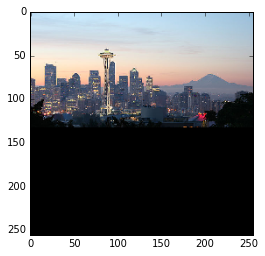

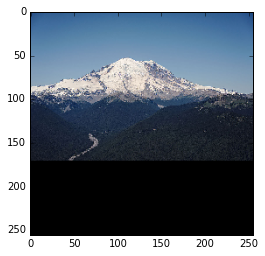

In [6]:
seattle_pil_image_result = G.get_image_at_quad_key(root_node_link=seattle_node_link, resolution=256, quad_key='')
mt_tacoma_pil_image_result = G.get_image_at_quad_key(root_node_link=mt_tacoma_node_link, resolution=256, quad_key='')
import matplotlib.pyplot as plt
plt.imshow(seattle_pil_image_result.value)
plt.figure()
plt.imshow(mt_tacoma_pil_image_result.value)

Let us insert the 'tacoma' node into the 'seattle' node at the top right. The quad key we will use is 13. 1 correpsonds to the top right quadrant, inside that we will insert at bottom right hence 3. 

In [20]:
insert_quad_key = '13'
new_seattle_node_link = NodeLink('new_seattle')
created_node_link = G.connect_child(root_node_link=seattle_node_link, quad_key=insert_quad_key, 
                                        child_node_link=mt_tacoma_node_link, new_root_name=new_seattle_node_link)
created_node_link

Result(new_seattle,0,)

Let us see how the new_seattle_node looks after the insertion.

In [21]:
new_seattle_image_result = G.get_image_at_quad_key(new_seattle_node_link, resolution=256, quad_key='')
new_seattle_image_result

Result(<PIL.Image.Image image mode=RGB size=256x256 at 0x7D5C080>,0,)

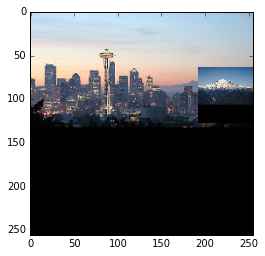

In [22]:
plt.imshow(new_seattle_image_result.value)

One can see a nice image of Mt. Tacoma inserted into image of Seattle.